## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9956085	total: 59.9ms	remaining: 59.8s
1:	learn: 0.9768182	total: 60.7ms	remaining: 30.3s
2:	learn: 0.9573590	total: 61.9ms	remaining: 20.6s
3:	learn: 0.9404346	total: 63ms	remaining: 15.7s
4:	learn: 0.9229179	total: 64.1ms	remaining: 12.8s
5:	learn: 0.9058810	total: 65.1ms	remaining: 10.8s
6:	learn: 0.8885639	total: 65.9ms	remaining: 9.35s
7:	learn: 0.8726090	total: 66.9ms	remaining: 8.29s
8:	learn: 0.8574491	total: 67.7ms	remaining: 7.46s
9:	learn: 0.8400377	total: 68.6ms	remaining: 6.79s
10:	learn: 0.8241302	total: 69.5ms	remaining: 6.25s
11:	learn: 0.8096363	total: 70.4ms	remaining: 5.79s
12:	learn: 0.7948110	total: 71.1ms	remaining: 5.4s
13:	learn: 0.7799260	total: 71.9ms	remaining: 5.06s
14:	learn: 0.7678311	total: 72.7ms	remaining: 4.77s
15:	learn: 0.7530414	total: 73.4ms	remaining: 4.52s
16:	learn: 0.7395077	total: 74.2ms	remaining: 4.29s
17:	learn: 0.7262044	total: 75ms	remaining: 4.09s
18:	learn: 0.7136350	total: 75.8ms	remaining: 3.9

58:	learn: 0.4278485	total: 110ms	remaining: 1.75s
59:	learn: 0.4239484	total: 111ms	remaining: 1.73s
60:	learn: 0.4198661	total: 111ms	remaining: 1.72s
61:	learn: 0.4158299	total: 112ms	remaining: 1.7s
62:	learn: 0.4129258	total: 113ms	remaining: 1.68s
63:	learn: 0.4092371	total: 114ms	remaining: 1.67s
64:	learn: 0.4063015	total: 115ms	remaining: 1.65s
65:	learn: 0.4029331	total: 116ms	remaining: 1.64s
66:	learn: 0.3995101	total: 117ms	remaining: 1.62s
67:	learn: 0.3961277	total: 117ms	remaining: 1.61s
68:	learn: 0.3927115	total: 118ms	remaining: 1.6s
69:	learn: 0.3897718	total: 119ms	remaining: 1.58s
70:	learn: 0.3866686	total: 120ms	remaining: 1.57s
71:	learn: 0.3826036	total: 121ms	remaining: 1.56s
72:	learn: 0.3797446	total: 122ms	remaining: 1.55s
73:	learn: 0.3766379	total: 123ms	remaining: 1.53s
74:	learn: 0.3735288	total: 123ms	remaining: 1.52s
75:	learn: 0.3709838	total: 124ms	remaining: 1.51s
76:	learn: 0.3674320	total: 125ms	remaining: 1.5s
77:	learn: 0.3646097	total: 126ms	

154:	learn: 0.2596060	total: 191ms	remaining: 1.04s
155:	learn: 0.2584935	total: 192ms	remaining: 1.04s
156:	learn: 0.2577611	total: 194ms	remaining: 1.04s
157:	learn: 0.2569662	total: 194ms	remaining: 1.03s
158:	learn: 0.2561088	total: 195ms	remaining: 1.03s
159:	learn: 0.2553178	total: 196ms	remaining: 1.03s
160:	learn: 0.2546344	total: 197ms	remaining: 1.03s
161:	learn: 0.2537106	total: 198ms	remaining: 1.02s
162:	learn: 0.2533362	total: 199ms	remaining: 1.02s
163:	learn: 0.2526486	total: 199ms	remaining: 1.01s
164:	learn: 0.2518107	total: 200ms	remaining: 1.01s
165:	learn: 0.2511699	total: 201ms	remaining: 1.01s
166:	learn: 0.2504840	total: 202ms	remaining: 1s
167:	learn: 0.2495950	total: 202ms	remaining: 1s
168:	learn: 0.2490258	total: 203ms	remaining: 999ms
169:	learn: 0.2484724	total: 204ms	remaining: 996ms
170:	learn: 0.2479303	total: 205ms	remaining: 993ms
171:	learn: 0.2473597	total: 206ms	remaining: 991ms
172:	learn: 0.2466214	total: 207ms	remaining: 987ms
173:	learn: 0.2458

283:	learn: 0.1892485	total: 300ms	remaining: 756ms
284:	learn: 0.1888027	total: 301ms	remaining: 755ms
285:	learn: 0.1883755	total: 302ms	remaining: 753ms
286:	learn: 0.1879976	total: 302ms	remaining: 751ms
287:	learn: 0.1878645	total: 303ms	remaining: 750ms
288:	learn: 0.1875691	total: 304ms	remaining: 748ms
289:	learn: 0.1873361	total: 305ms	remaining: 747ms
290:	learn: 0.1868119	total: 306ms	remaining: 745ms
291:	learn: 0.1865324	total: 307ms	remaining: 744ms
292:	learn: 0.1859143	total: 307ms	remaining: 742ms
293:	learn: 0.1853664	total: 308ms	remaining: 740ms
294:	learn: 0.1849171	total: 309ms	remaining: 739ms
295:	learn: 0.1844111	total: 310ms	remaining: 737ms
296:	learn: 0.1839920	total: 311ms	remaining: 736ms
297:	learn: 0.1837072	total: 312ms	remaining: 734ms
298:	learn: 0.1833543	total: 312ms	remaining: 733ms
299:	learn: 0.1831850	total: 313ms	remaining: 731ms
300:	learn: 0.1827781	total: 314ms	remaining: 729ms
301:	learn: 0.1824582	total: 315ms	remaining: 728ms
302:	learn: 

377:	learn: 0.1601993	total: 381ms	remaining: 628ms
378:	learn: 0.1599525	total: 382ms	remaining: 626ms
379:	learn: 0.1596355	total: 383ms	remaining: 625ms
380:	learn: 0.1592193	total: 384ms	remaining: 624ms
381:	learn: 0.1588837	total: 385ms	remaining: 623ms
382:	learn: 0.1586063	total: 386ms	remaining: 621ms
383:	learn: 0.1585585	total: 387ms	remaining: 621ms
384:	learn: 0.1582689	total: 388ms	remaining: 620ms
385:	learn: 0.1579246	total: 389ms	remaining: 619ms
386:	learn: 0.1576692	total: 390ms	remaining: 618ms
387:	learn: 0.1573950	total: 391ms	remaining: 616ms
388:	learn: 0.1569769	total: 391ms	remaining: 615ms
389:	learn: 0.1567536	total: 392ms	remaining: 614ms
390:	learn: 0.1566083	total: 393ms	remaining: 613ms
391:	learn: 0.1563166	total: 394ms	remaining: 611ms
392:	learn: 0.1560473	total: 395ms	remaining: 610ms
393:	learn: 0.1556735	total: 396ms	remaining: 609ms
394:	learn: 0.1554125	total: 397ms	remaining: 607ms
395:	learn: 0.1553689	total: 397ms	remaining: 606ms
396:	learn: 

506:	learn: 0.1313922	total: 490ms	remaining: 476ms
507:	learn: 0.1310872	total: 491ms	remaining: 475ms
508:	learn: 0.1307928	total: 492ms	remaining: 474ms
509:	learn: 0.1304611	total: 492ms	remaining: 473ms
510:	learn: 0.1302441	total: 493ms	remaining: 472ms
511:	learn: 0.1300070	total: 494ms	remaining: 471ms
512:	learn: 0.1299809	total: 495ms	remaining: 470ms
513:	learn: 0.1299551	total: 496ms	remaining: 469ms
514:	learn: 0.1297581	total: 496ms	remaining: 468ms
515:	learn: 0.1296020	total: 497ms	remaining: 466ms
516:	learn: 0.1293771	total: 498ms	remaining: 465ms
517:	learn: 0.1291308	total: 499ms	remaining: 464ms
518:	learn: 0.1290528	total: 500ms	remaining: 463ms
519:	learn: 0.1288755	total: 501ms	remaining: 462ms
520:	learn: 0.1288579	total: 501ms	remaining: 461ms
521:	learn: 0.1286593	total: 502ms	remaining: 460ms
522:	learn: 0.1286183	total: 503ms	remaining: 459ms
523:	learn: 0.1283997	total: 504ms	remaining: 458ms
524:	learn: 0.1281861	total: 505ms	remaining: 456ms
525:	learn: 

604:	learn: 0.1144938	total: 572ms	remaining: 373ms
605:	learn: 0.1141923	total: 573ms	remaining: 373ms
606:	learn: 0.1140042	total: 574ms	remaining: 372ms
607:	learn: 0.1138446	total: 575ms	remaining: 370ms
608:	learn: 0.1138283	total: 575ms	remaining: 369ms
609:	learn: 0.1136612	total: 576ms	remaining: 368ms
610:	learn: 0.1134069	total: 577ms	remaining: 367ms
611:	learn: 0.1132398	total: 578ms	remaining: 366ms
612:	learn: 0.1130975	total: 579ms	remaining: 365ms
613:	learn: 0.1130834	total: 580ms	remaining: 365ms
614:	learn: 0.1128803	total: 581ms	remaining: 364ms
615:	learn: 0.1126539	total: 582ms	remaining: 363ms
616:	learn: 0.1126427	total: 583ms	remaining: 362ms
617:	learn: 0.1124496	total: 584ms	remaining: 361ms
618:	learn: 0.1122315	total: 585ms	remaining: 360ms
619:	learn: 0.1121219	total: 586ms	remaining: 359ms
620:	learn: 0.1120273	total: 586ms	remaining: 358ms
621:	learn: 0.1118927	total: 587ms	remaining: 357ms
622:	learn: 0.1118007	total: 589ms	remaining: 356ms
623:	learn: 

731:	learn: 0.0959378	total: 680ms	remaining: 249ms
732:	learn: 0.0959200	total: 682ms	remaining: 248ms
733:	learn: 0.0956332	total: 682ms	remaining: 247ms
734:	learn: 0.0953857	total: 683ms	remaining: 246ms
735:	learn: 0.0952295	total: 684ms	remaining: 245ms
736:	learn: 0.0951031	total: 685ms	remaining: 244ms
737:	learn: 0.0949528	total: 686ms	remaining: 243ms
738:	learn: 0.0948296	total: 686ms	remaining: 242ms
739:	learn: 0.0947061	total: 687ms	remaining: 241ms
740:	learn: 0.0946153	total: 688ms	remaining: 240ms
741:	learn: 0.0944568	total: 689ms	remaining: 239ms
742:	learn: 0.0943082	total: 689ms	remaining: 238ms
743:	learn: 0.0941566	total: 690ms	remaining: 238ms
744:	learn: 0.0941122	total: 691ms	remaining: 237ms
745:	learn: 0.0940249	total: 692ms	remaining: 236ms
746:	learn: 0.0938542	total: 693ms	remaining: 235ms
747:	learn: 0.0937596	total: 694ms	remaining: 234ms
748:	learn: 0.0935473	total: 695ms	remaining: 233ms
749:	learn: 0.0934652	total: 695ms	remaining: 232ms
750:	learn: 

827:	learn: 0.0846588	total: 763ms	remaining: 158ms
828:	learn: 0.0845846	total: 764ms	remaining: 158ms
829:	learn: 0.0843852	total: 765ms	remaining: 157ms
830:	learn: 0.0843782	total: 766ms	remaining: 156ms
831:	learn: 0.0842594	total: 766ms	remaining: 155ms
832:	learn: 0.0840979	total: 767ms	remaining: 154ms
833:	learn: 0.0839096	total: 768ms	remaining: 153ms
834:	learn: 0.0837696	total: 769ms	remaining: 152ms
835:	learn: 0.0836090	total: 770ms	remaining: 151ms
836:	learn: 0.0835274	total: 771ms	remaining: 150ms
837:	learn: 0.0834163	total: 771ms	remaining: 149ms
838:	learn: 0.0833929	total: 772ms	remaining: 148ms
839:	learn: 0.0833193	total: 773ms	remaining: 147ms
840:	learn: 0.0833061	total: 774ms	remaining: 146ms
841:	learn: 0.0832030	total: 775ms	remaining: 145ms
842:	learn: 0.0831250	total: 775ms	remaining: 144ms
843:	learn: 0.0830135	total: 776ms	remaining: 143ms
844:	learn: 0.0828627	total: 777ms	remaining: 143ms
845:	learn: 0.0826954	total: 778ms	remaining: 142ms
846:	learn: 

957:	learn: 0.0710905	total: 871ms	remaining: 38.2ms
958:	learn: 0.0708941	total: 872ms	remaining: 37.3ms
959:	learn: 0.0708029	total: 873ms	remaining: 36.4ms
960:	learn: 0.0707148	total: 874ms	remaining: 35.5ms
961:	learn: 0.0705614	total: 875ms	remaining: 34.5ms
962:	learn: 0.0704498	total: 875ms	remaining: 33.6ms
963:	learn: 0.0703928	total: 876ms	remaining: 32.7ms
964:	learn: 0.0702729	total: 877ms	remaining: 31.8ms
965:	learn: 0.0701779	total: 878ms	remaining: 30.9ms
966:	learn: 0.0701194	total: 879ms	remaining: 30ms
967:	learn: 0.0699857	total: 880ms	remaining: 29.1ms
968:	learn: 0.0698829	total: 880ms	remaining: 28.2ms
969:	learn: 0.0697441	total: 881ms	remaining: 27.3ms
970:	learn: 0.0696638	total: 882ms	remaining: 26.3ms
971:	learn: 0.0696024	total: 883ms	remaining: 25.4ms
972:	learn: 0.0695323	total: 884ms	remaining: 24.5ms
973:	learn: 0.0694505	total: 884ms	remaining: 23.6ms
974:	learn: 0.0693455	total: 885ms	remaining: 22.7ms
975:	learn: 0.0692315	total: 886ms	remaining: 21

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

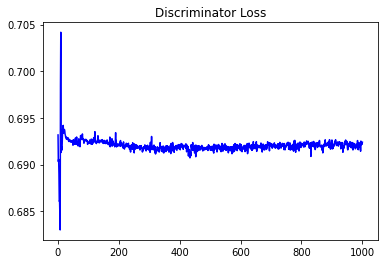

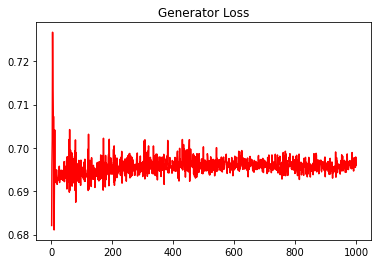

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09554505586186354


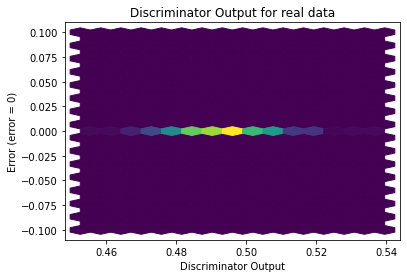

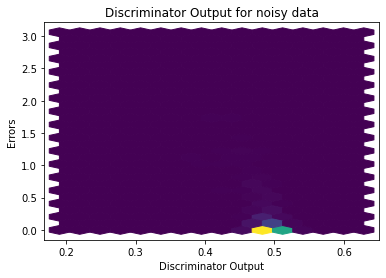

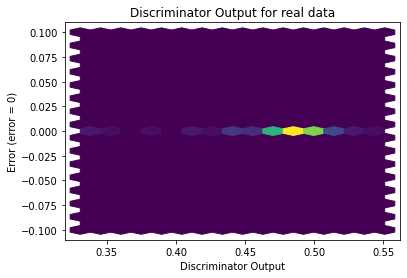

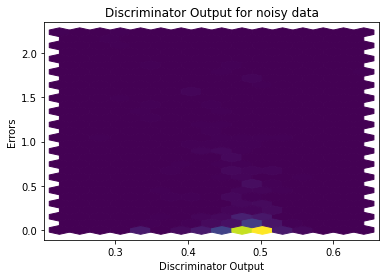

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


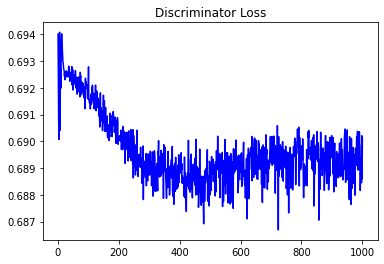

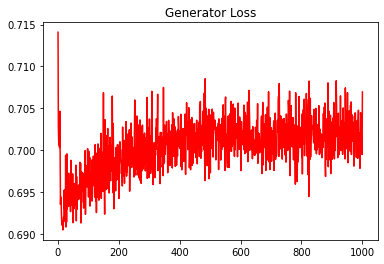

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09766743744252829


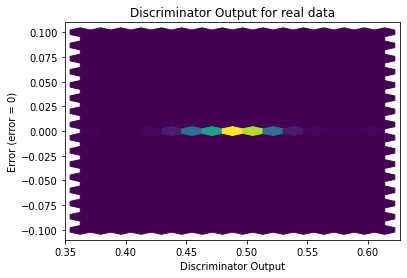

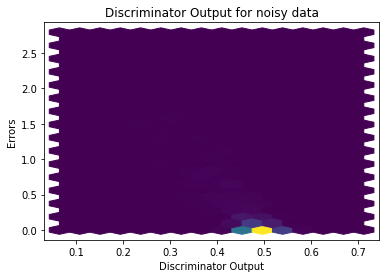

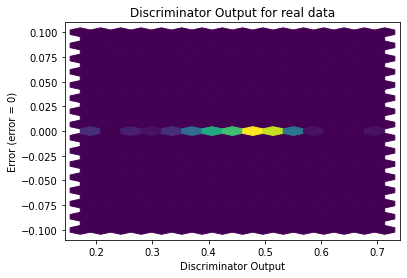

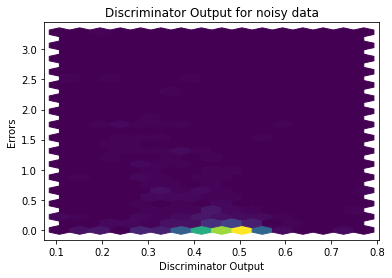

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9298]], requires_grad=True)
